![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center> Read and plot Gulf Stream SWOT data at one specific date </center></h1>
<h2><center>For 1 day orbit data </center></h2></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [1]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt


from src import mod_plot
from src import mod_switchvar
from src.dict_regions_info import *

In [2]:

region_info = RegionInfo('GS_info').region_info   # Region dictionary info from dict_regions_info.py

label_noisy = 'Noisy'   # Name for plots title and saving figures
label_denoised = 'Denoised'   # Name for plots title and saving figures


name_noisy = 'ssha_karin_2_edited' # Name of the denoised SWOT variable in the xarray file 
name_denoised = 'duacs_ssha_karin_2_filtered' # Name of the denoised SWOT variable in the xarray file 

## Read from regional data file "../swot_data/V1.0.2_CALVAL/SWOT_L3_LR_SSH_Expert_'region'_v1.0.2.nc"

In [3]:
path_data = '../swot_data/V1.0.2_CALVAL/SWOT_L3_LR_SSH_Expert_GS_v1.0.2.nc'
 
date_plot = np.datetime64('2023-05-02')

orbit = '1d'

In [4]:
ds_SWOT = xr.open_mfdataset(path_data) 

## Plot noisy and baseline denoised SSH

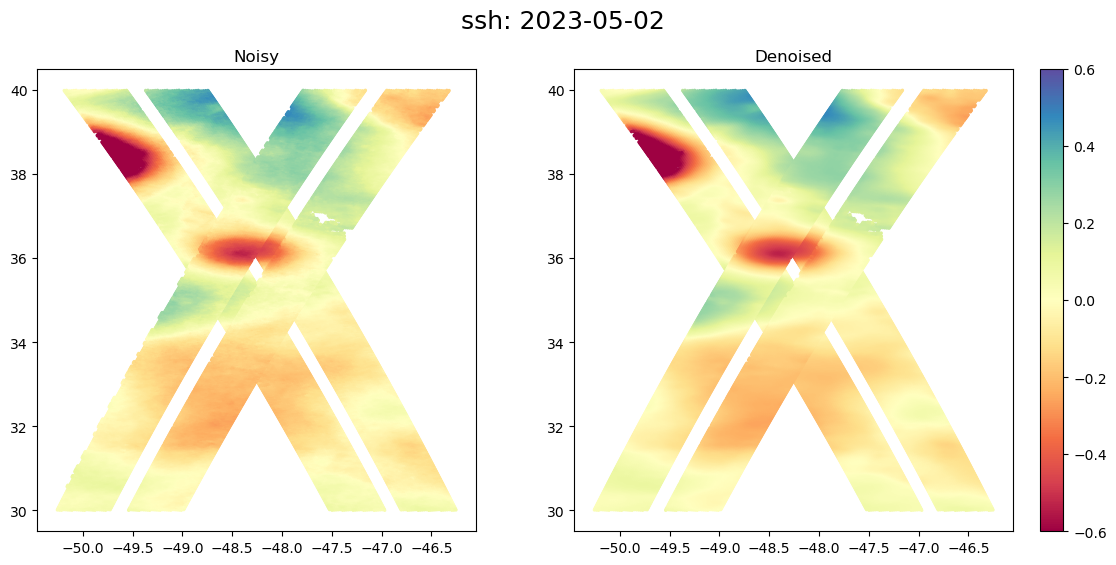

In [5]:
 
mod_plot.plot_compare_snapshots(ds_SWOT, methods=[label_noisy,label_denoised], var_type='ssh', name_var=[name_noisy,name_denoised], date_plot=date_plot, region_info=region_info, method=label_noisy, orbit = orbit, colsize = 14)


## Compute and plot SSH gradients and Laplacian

In [6]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT[name_noisy])
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT[name_denoised]) 

ds_SWOT = ds_SWOT.assign(grad_new_editing=lambda ds_SWOT: ds_SWOT[name_noisy] * 0 + grad_new_editing)
ds_SWOT = ds_SWOT.assign(grad_denoised_unet=lambda ds_SWOT: ds_SWOT[name_denoised] * 0 + grad_denoised_unet) 


ds_SWOT = ds_SWOT.assign(lapl_new_editing=lambda ds_SWOT: ds_SWOT[name_noisy] * 0 + lapl_new_editing)
ds_SWOT = ds_SWOT.assign(lapl_denoised_unet=lambda ds_SWOT: ds_SWOT[name_denoised] * 0 + lapl_denoised_unet) 


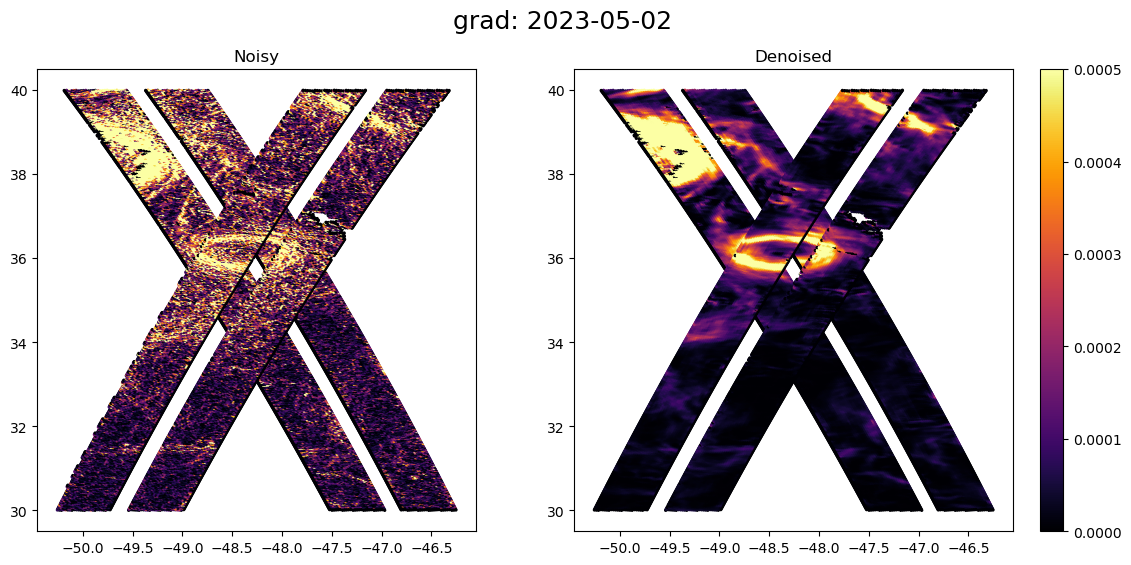

In [7]:
  
mod_plot.plot_compare_snapshots(ds_SWOT, methods=[label_noisy, label_denoised], var_type='grad', name_var=['grad_new_editing','grad_denoised_unet'], date_plot=date_plot, region_info=region_info, method=label_noisy, orbit = orbit, colsize = 14)
 

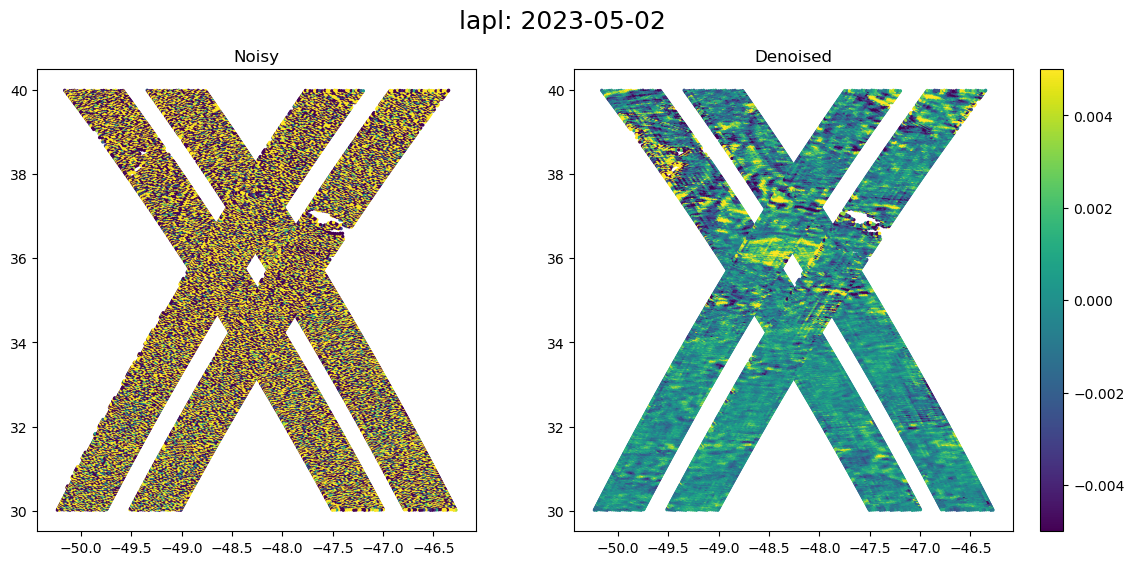

In [8]:
  
mod_plot.plot_compare_snapshots(ds_SWOT, methods=[label_noisy, label_denoised], var_type='lapl', name_var=['lapl_new_editing','lapl_denoised_unet'], date_plot=date_plot, region_info=region_info, method=label_noisy, orbit = orbit, colsize = 14)
 